In [1]:
import numpy as np
import pandas as pd
from scipy.special import gammaln, gamma
from collections import Counter
from scipy.optimize import basinhopping
np.set_printoptions(suppress=True)

In [38]:
# Load the data and process it.

df = pd.read_csv("../mturk_surveys.csv")
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df['date'] = pd.to_datetime(df['hit_answered_date'].apply(lambda x : x.date()))

# Calculate the time period of each survey answer. 
# Below we take out time period to be 30-day periods. 
# We can change this to be weeks, months, or anything else
window_length = 30
minDate = min(df['date'])
df['period'] = (df['date'] - minDate).dt.days // window_length 

df = df[df['period'] < 21]
# Create a list of all unique worker IDs 
workers = pd.DataFrame(list(set(df.worker_id)), columns=['worker_id']).reset_index().set_index('worker_id')

# Fix the issue of duplicate records within the same period.
data = df[['worker_id', 'period']].drop_duplicates().pivot_table(
    index = 'worker_id',
    values = 'period',                    
    aggfunc=('count','min','max')
).join(workers).set_index('index').sort_index()

# Aggregate the capture histories
#data = data.groupby(['min', 'max', 'count']).size().reset_index(name='count_history')
S = df['period'].max() + 1
dat = np.zeros(S + 1)
out = Counter(data['count'].values)
for k,v in out.items():
    dat[k] = v
V = len(workers)
print(S, V)

21 31850


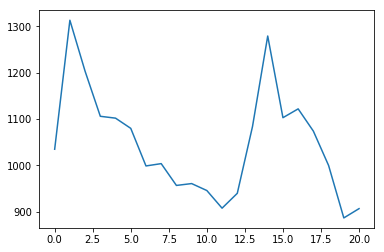

In [39]:
ddd = dict(Counter(data[data['count'] == 1]['max'].values))
lists = sorted(ddd.items())
x, y = zip(*lists)
plt.plot(x, y)

In [40]:
# Alpha Beta version
def BB(S, k, alpha, beta):
    up = gamma(k + alpha) * gamma(S - k + beta) * gamma(alpha + beta)
    down = gamma(alpha) * gamma(beta) * gamma(S + alpha + beta)
    return up / down

In [67]:
def mll(initParams):
    # params
    f0    = np.exp(initParams[0])
    alpha = initParams[1]
    beta  = initParams[2]
    
    N = gammaln(V + f0 +1) - gammaln(f0 + 1)
    L0 = f0 * np.log(BB(S, 0, alpha, beta))
    Lk = 0
    
    # fk likelihood
    for k in range(1, len(dat)):
        Lk += dat[k] * np.log(BB(S, k, alpha, beta))
    
    obj = N + L0 + Lk
    
    if -obj < -118000:
        print(f0, alpha, beta, -obj)
    
    return -obj

In [ ]:
# Bounds
B= ((1,14), (0.000001, 1), (1, 10))

#args
minimizer_kwargs = dict(method="L-BFGS-B", bounds=B)

#run
initParams = np.array([10000, .5, 5])
res = basinhopping(mll, initParams, minimizer_kwargs=minimizer_kwargs, niter = 50000)
print(res)
print(np.exp(res['x'][0]) + V)

In [21]:
mll([403608.7895533 ,      0.02039742,      3.7429387 ,      0.01037844,
            0.20782324])

-107217.0270592348

In [22]:
mll([83793.7773379 ,     0.19999895,     4.07278073,     0.01197954,
           0.70142692])

-110056.33441323455

In [64]:
mll([234776.72579006,      0.03929604,      3.78447354,      0.01050833,
            0.33356468])

-121053.78927293565

In [67]:
mll([57392.28189185,     0.38756928,     4.32406151,     0.01459061,
           0.80091354])

-120812.86576105905

In [114]:
mll([125104.16766101,      0.09702091,      3.89744013,      0.01093061,
            0.54677371])

-121029.53788561595

In [43]:
mll([12.8,      0.09702091,      3.89744013])

-97002.804319622

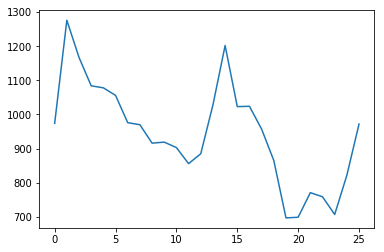

In [25]:
ddd = dict(Counter(data[data['count'] == 1]['max'].values))
lists = sorted(ddd.items())
x, y = zip(*lists)
plt.plot(x, y)

In [78]:
lists

[(0, 928),
 (1, 1228),
 (2, 1132),
 (3, 1049),
 (4, 1035),
 (5, 1016),
 (6, 926),
 (7, 923),
 (8, 882),
 (9, 887),
 (10, 849),
 (11, 821),
 (12, 836),
 (13, 993),
 (14, 1126),
 (15, 972),
 (16, 961),
 (17, 894),
 (18, 804),
 (19, 629),
 (20, 625),
 (21, 678),
 (22, 659),
 (23, 602),
 (24, 643),
 (25, 700),
 (26, 826),
 (27, 807),
 (28, 761),
 (29, 821),
 (30, 726),
 (31, 840),
 (32, 857),
 (33, 865),
 (34, 1092),
 (35, 31)]

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt